In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [12]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [13]:
df=pd.read_csv(url)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
lm

LinearRegression()

In [16]:
X = df[['highway-mpg']]
Y = df['price']

In [17]:
lm.fit(X,Y)

LinearRegression()

In [18]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [19]:
lm.intercept_

38423.3058581574

In [20]:
lm.coef_

array([-821.73337832])

# Q1 (A, B)

## Create a linearRegression called lm1
## Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [22]:
lm1= LinearRegression()
lm1

LinearRegression()

In [23]:
X = df[['engine-size']]
Y = df[['price']]

In [26]:
lm1.fit(X, Y)

LinearRegression()

In [27]:
Yhat= lm1.predict(X)
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [28]:
lm.intercept_

array([-7963.33890628])

In [29]:
lm.coef_

array([[166.86001569]])

# Q2 What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price"

In [31]:
Yhat = -7963.34+166.86*X
price = -7963.34+166.86*df['engine-size']

# -------------------------------------------------------------------------------------------

# Multiple Linear Regression

In [32]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [34]:
lm.fit(Z, df['price'])

LinearRegression()

In [35]:
lm.intercept_

-15806.624626329194

In [36]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

# Q3 Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [41]:
lm2= LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [43]:
lm2.coef_

array([   1.49789586, -820.45434016])

# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------

# Model Evaluation Using Visualization

In [44]:
import seaborn as sns
%matplotlib inline

# Regression Plot

## When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots

(0.0, 48176.80785703446)

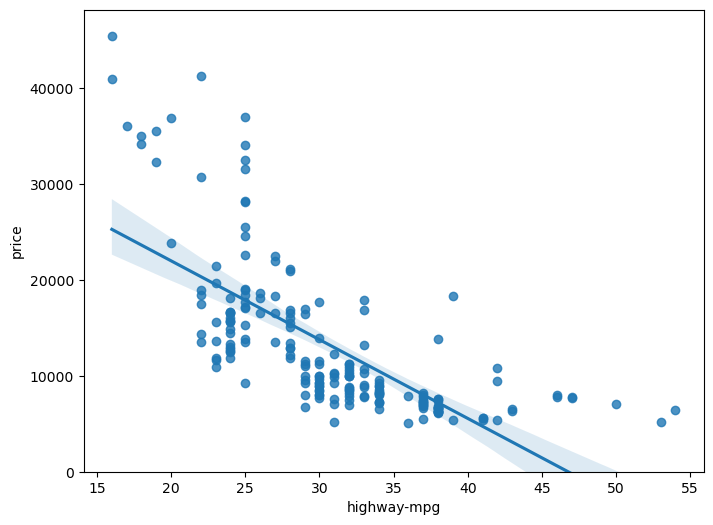

In [47]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

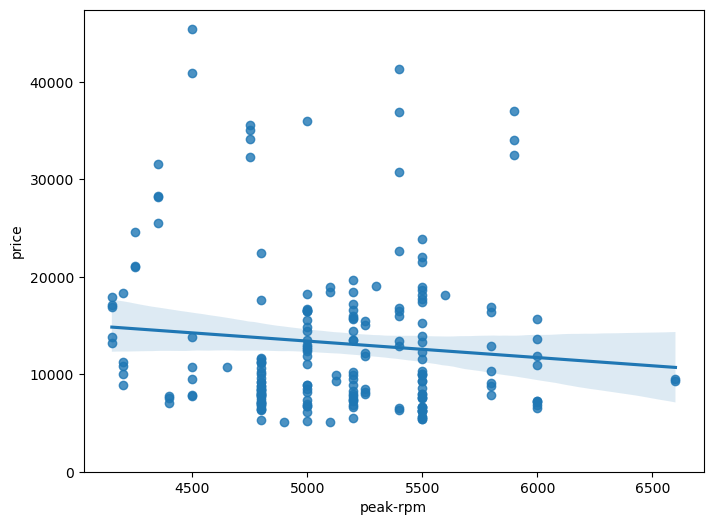

In [48]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

# Q4 Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [50]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# Residual Plot
##  If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data

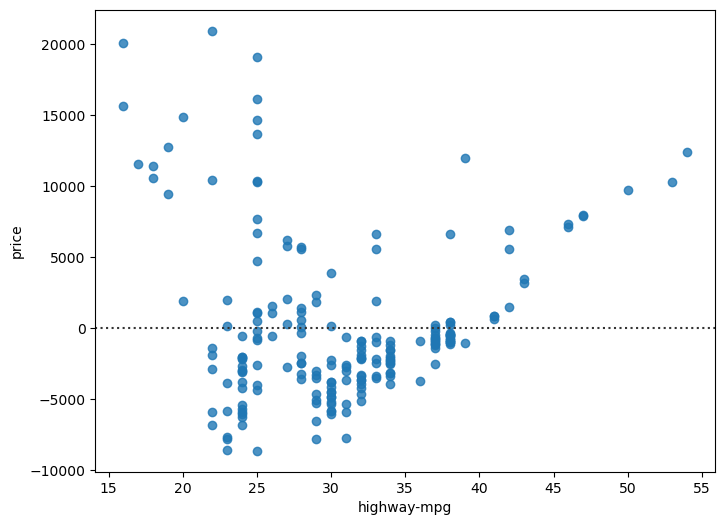

In [51]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

# Multiple Linear Regression

### How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

### One way to look at the fit of the model is by looking at the (distribution plot) . We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values

In [52]:
Y_hat = lm.predict(Z)

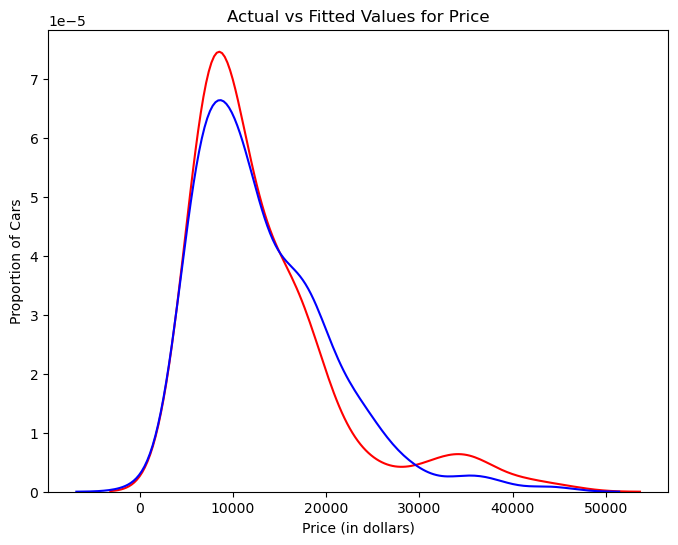

In [53]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#  Polynomial Regression and Pipelines

In [54]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [55]:
x = df['highway-mpg']
y = df['price']

In [56]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


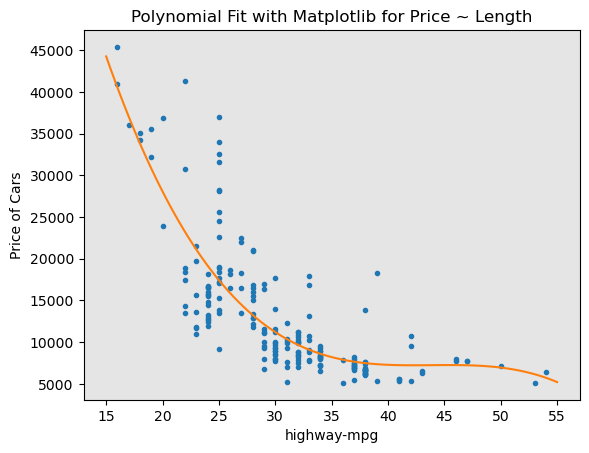

In [57]:
PlotPolly(p, x, y, 'highway-mpg')

In [58]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

# Q5 Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


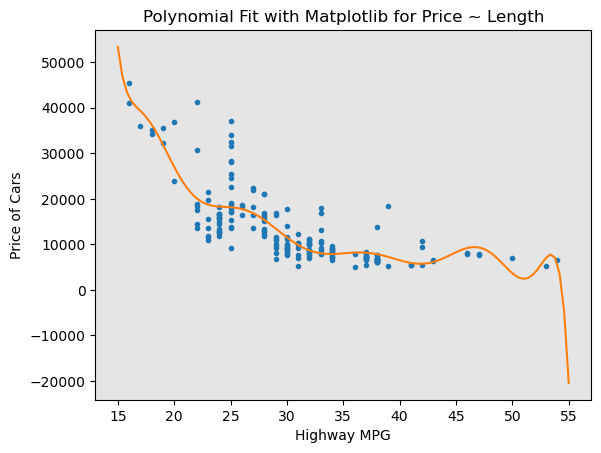

In [59]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [62]:
Z_pr=pr.fit_transform(Z)

In [64]:
Z.shape

(201, 4)

In [65]:
Z_pr.shape

(201, 15)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [68]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [69]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [70]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Q6 Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [71]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# ---------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------

# Measures for In-Sample Evaluation
### When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

### Two very important measures that are often used in Statistics to determine the accuracy of a model are:

## R^2 / R-squared
## Mean Squared Error (MSE)
## R-squared

### R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

### The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

## Mean Squared Error (MSE)

### The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

# Model 1: Simple Linear Regression

In [72]:
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


##### We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

### Let's calculate the MSE:

In [73]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


#                                       ------------------------------------------------

# Model 2: Multiple Linear Regression

In [76]:
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


##### We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

### Let's calculate the MSE.

In [78]:
Y_predict_multifit = lm.predict(Z)

In [79]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


# Model 3: Polynomial Fit

In [80]:
from sklearn.metrics import r2_score

In [81]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


##### We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [82]:
mean_squared_error(df['price'], p(x))

20474146.426361207

# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------

# Prediction and Decision Making

In [83]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [84]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [85]:
lm.fit(X, Y)
lm

LinearRegression()

In [86]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

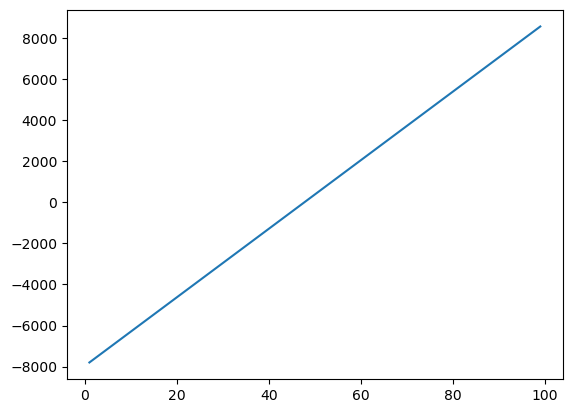

In [87]:
plt.plot(new_input, yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

### Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

### What is a good R-squared value?
#### When comparing models, the model with the higher R-squared value is a better fit for the data.

### What is a good MSE?
#### When comparing models, the model with the smallest MSE value is a better fit for the data.

## Let's take a look at the values for the different models.
### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
#### R-squared: 0.49659118843391759
#### MSE: 3.16 x10^7

#### Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
#### R-squared: 0.80896354913783497
#### MSE: 1.2 x10^7

#### Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
#### R-squared: 0.6741946663906514
#### MSE: 2.05 x 10^7

# Conclusion
## Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. 
## This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.